In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("C:/Users/ASUS/Downloads/Tanmay_22M1850_data.csv")
df

,Time(s),Extension(mm),Load(N),Compressive extension(mm),Compressive strain (Extension)(mm/mm),Compressive stress(MPa)
0,0.0,0.00000,0.00043,0.00000,0.00000,0.00001
1,0.1,0.00076,0.00057,0.00076,0.00013,0.00001
2,0.2,0.00104,-0.00019,0.00104,0.00017,0.00000
3,0.3,0.00173,0.00061,0.00173,0.00029,0.00001
4,0.4,0.00305,0.00008,0.00305,0.00051,0.00000
...,...,...,...,...,...,...
96,9.6,0.15880,0.00171,0.15880,0.02634,0.00003
97,9.7,0.16048,0.00234,0.16048,0.02661,0.00004
98,9.8,0.16214,0.00112,0.16214,0.02689,0.00002
99,9.9,0.16381,0.00269,0.16381,0.02717,0.00004


In [88]:
df.isnull().sum()

Time(s)                                  0
Extension(mm)                            0
Load(N)                                  0
Compressive extension(mm)                0
Compressive strain (Extension)(mm/mm)    0
Compressive stress(MPa)                  0
dtype: int64

# Exploratory data analysis

In [89]:
df.keys()

Index(['Time(s)', 'Extension(mm)', 'Load(N)', 'Compressive extension(mm)',
       'Compressive strain (Extension)(mm/mm)', 'Compressive stress(MPa)'],
      dtype='object')

In [90]:
parameters = ['Time(s)', 'Extension(mm)', 'Load(N)', 'Compressive extension(mm)',
       'Compressive strain (Extension)(mm/mm)', 'Compressive stress(MPa)']

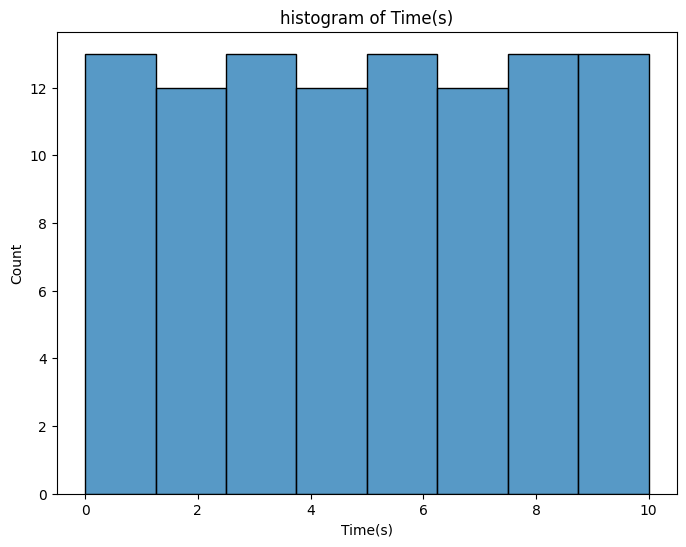

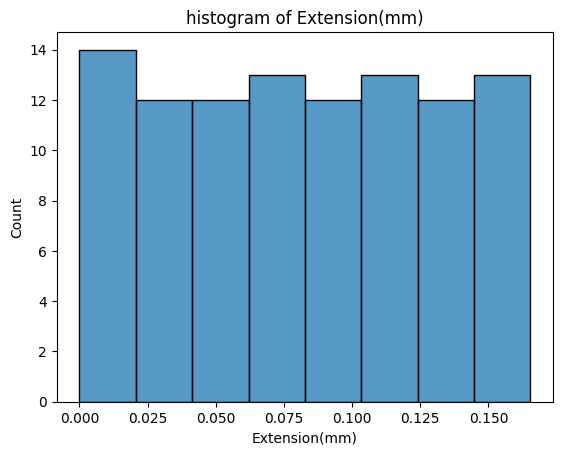

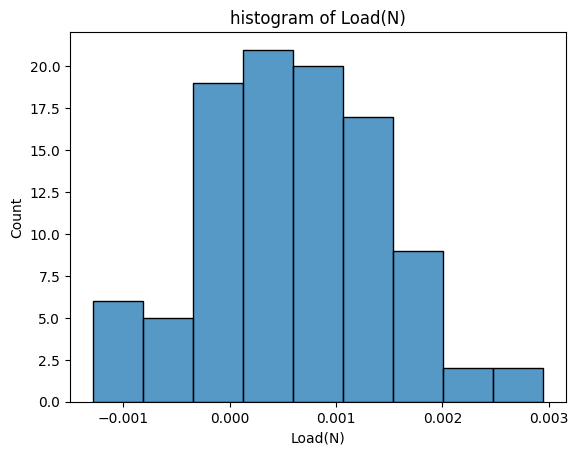

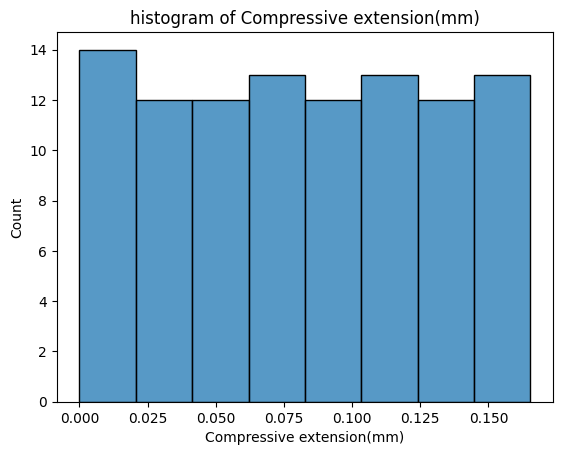

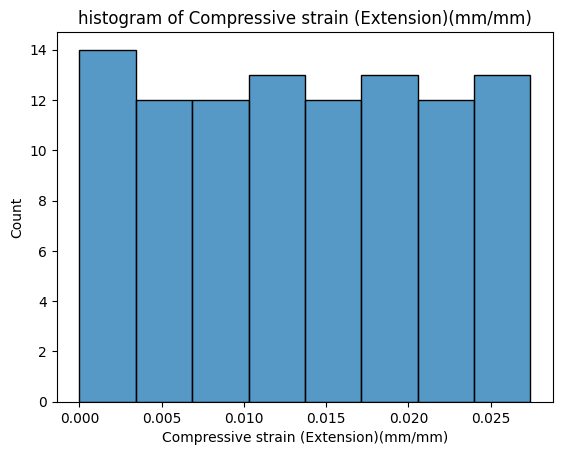

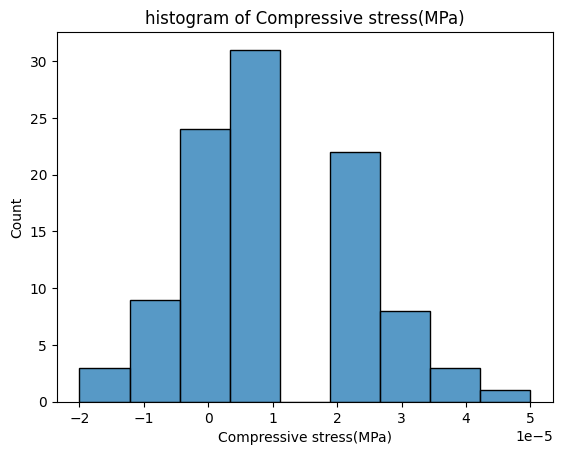

<Figure size 640x480 with 0 Axes>

In [91]:
plt.figure(figsize= (8,6))
for i in parameters:
    sns.histplot(x= i,data= df)
    plt.title(f'histogram of {i}')
    plt.figure()



Q1, Q2,Q3,Q4 of Time(s) are [ 2.5  5.   7.5 10. ]


Q1, Q2,Q3,Q4 of Extension(mm) are [0.0403  0.08198 0.12381 0.16536]


Q1, Q2,Q3,Q4 of Load(N) are [5.00e-05 5.70e-04 1.17e-03 2.95e-03]


Q1, Q2,Q3,Q4 of Compressive extension(mm) are [0.0403  0.08198 0.12381 0.16536]


Q1, Q2,Q3,Q4 of Compressive strain (Extension)(mm/mm) are [0.00668 0.01359 0.02053 0.02742]


Q1, Q2,Q3,Q4 of Compressive stress(MPa) are [0.e+00 1.e-05 2.e-05 5.e-05]


<Figure size 800x600 with 0 Axes>

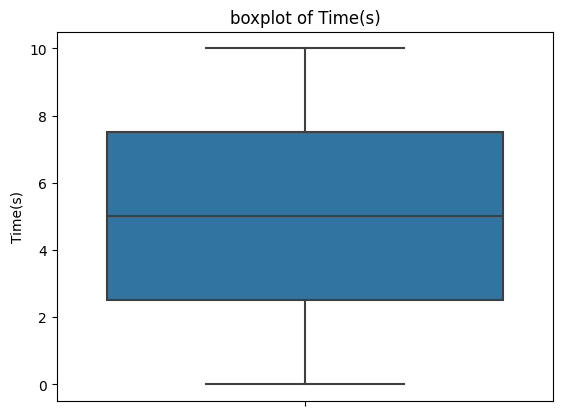

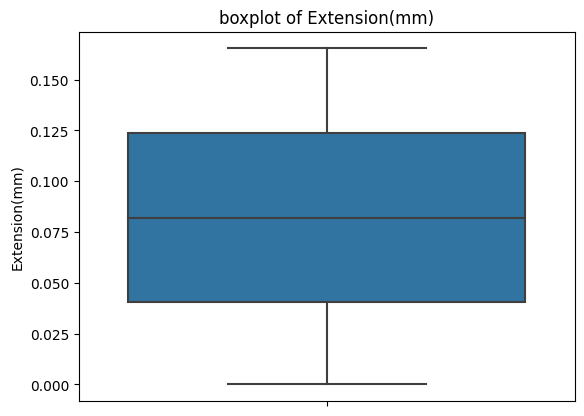

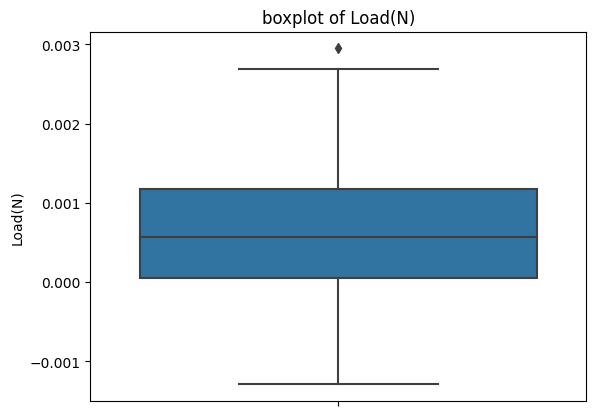

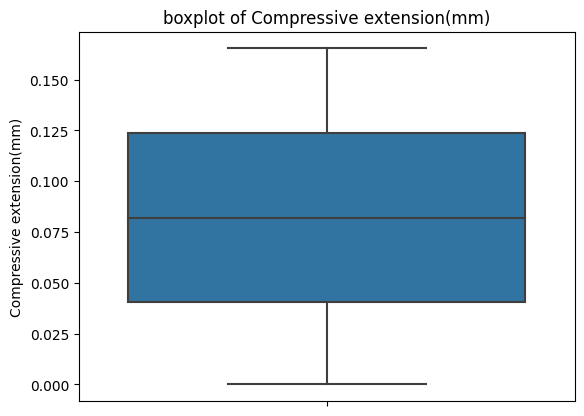

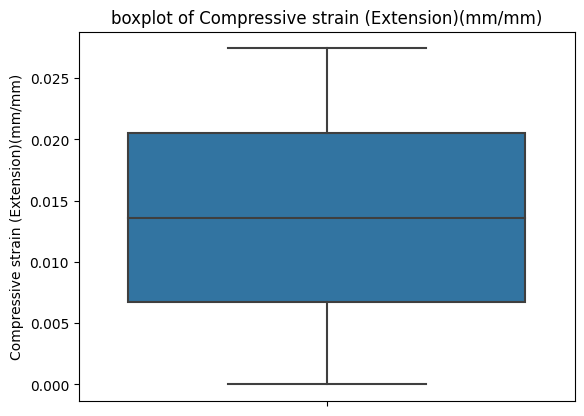

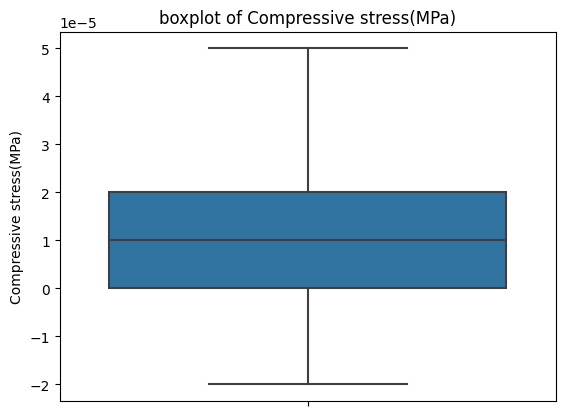

In [92]:
plt.figure(figsize= (8,6))
for i in parameters:
    plt.figure()
    sns.boxplot(y= i,data= df)
    plt.title(f'boxplot of {i}')
    print('\n')

    print(f'Q1, Q2,Q3,Q4 of {i} are {np.quantile(df[i],[0.25,0.5,0.75,1])}')

<Figure size 800x600 with 0 Axes>

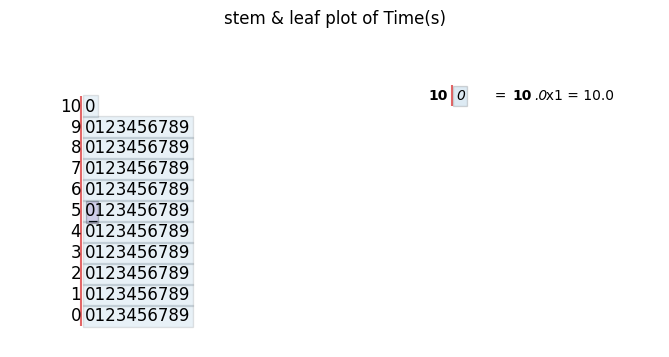

<Figure size 640x480 with 0 Axes>

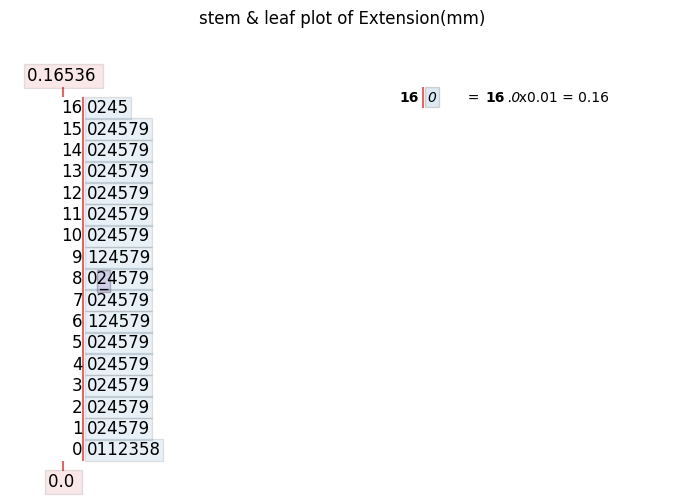

<Figure size 640x480 with 0 Axes>

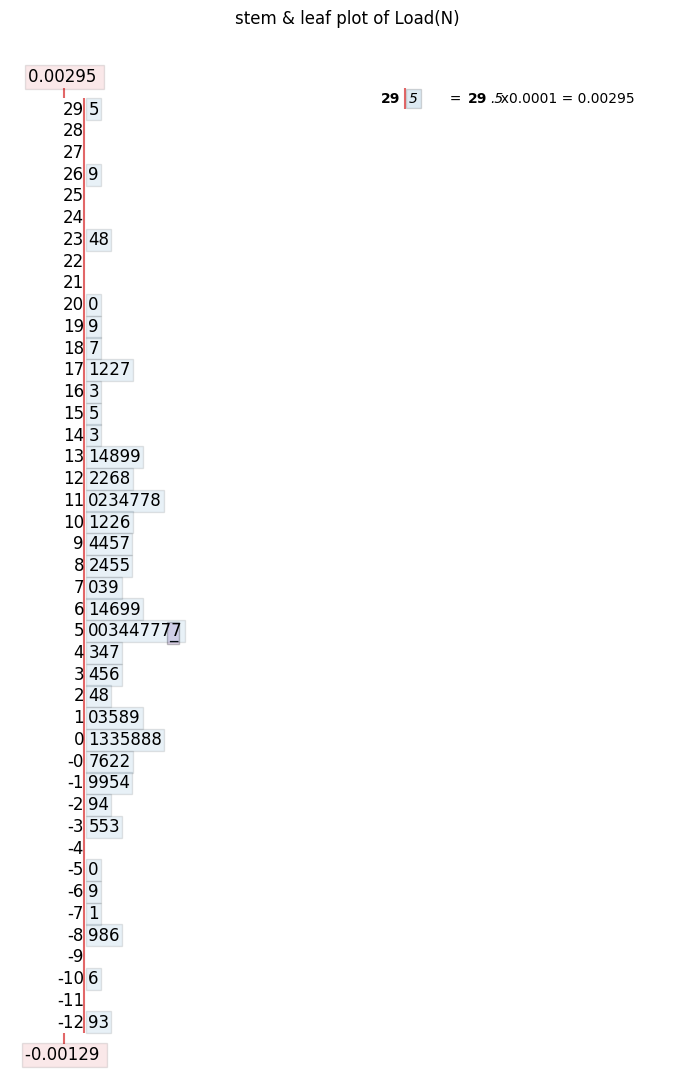

<Figure size 640x480 with 0 Axes>

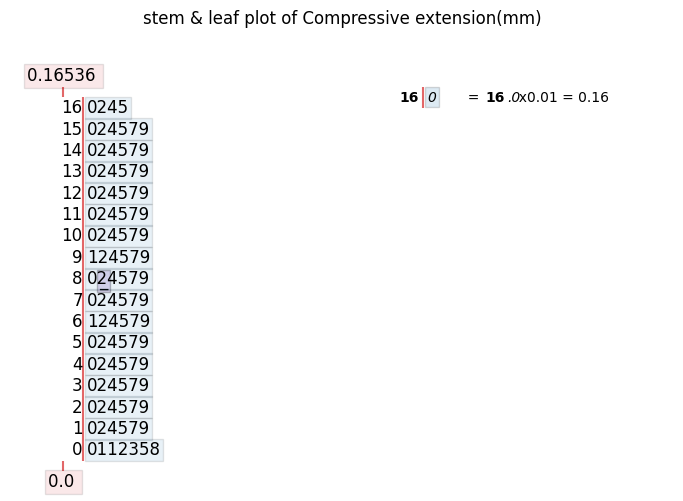

<Figure size 640x480 with 0 Axes>

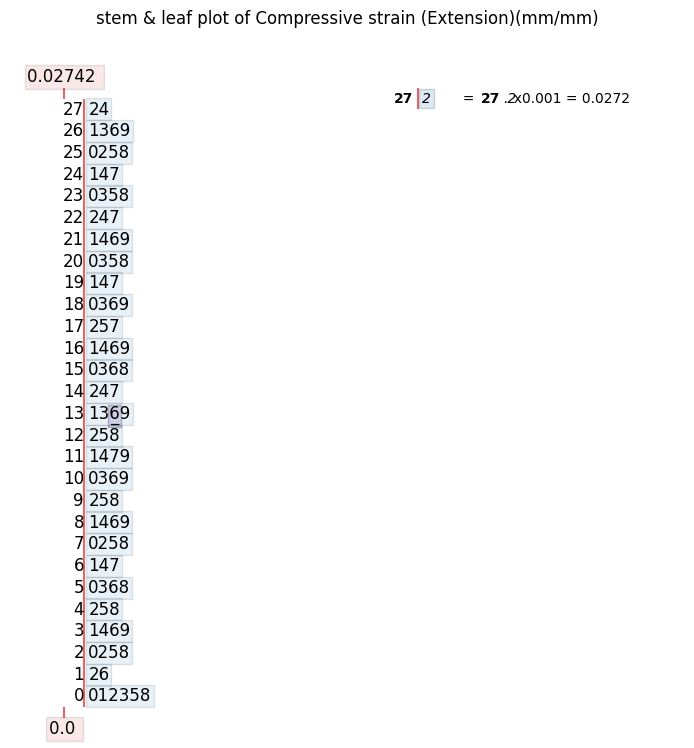

<Figure size 640x480 with 0 Axes>

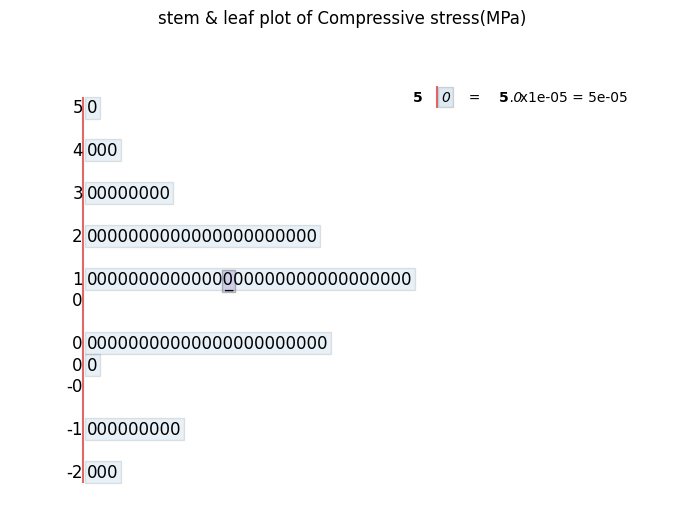

<Figure size 640x480 with 0 Axes>

In [93]:
import stemgraphic
plt.figure(figsize= (8,6))
for i in parameters:
    fig,ax = stemgraphic.stem_graphic(df[i],aggregation= False)
    ax.set_title(f'stem & leaf plot of {i}')
    plt.figure()

# Distribution analysis

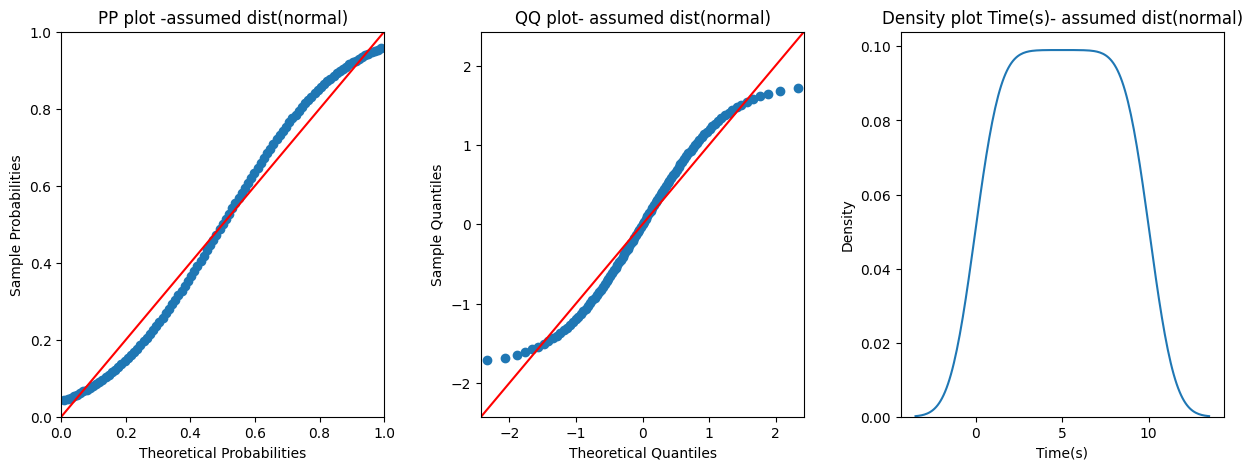

<Figure size 640x480 with 0 Axes>

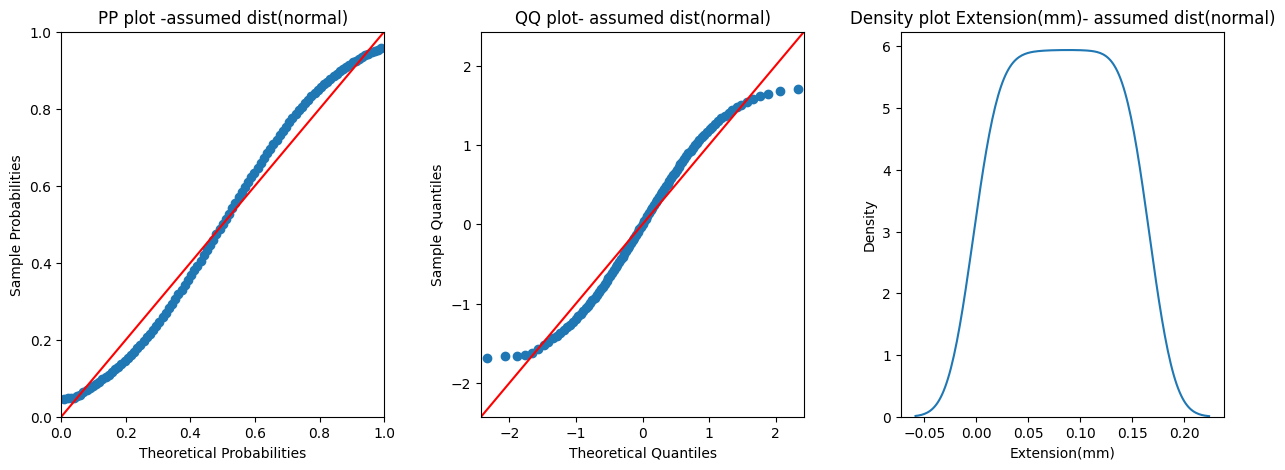

<Figure size 640x480 with 0 Axes>

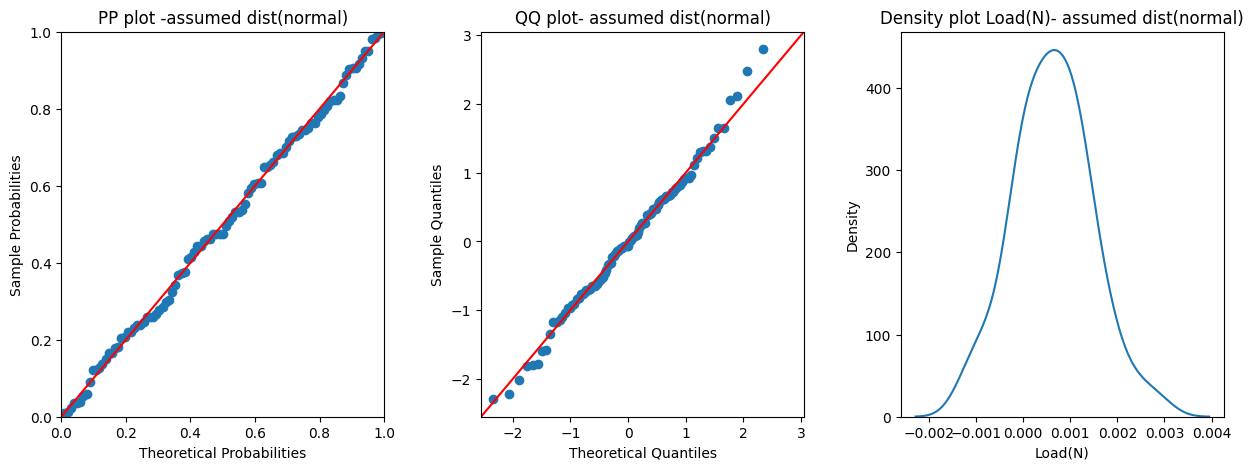

<Figure size 640x480 with 0 Axes>

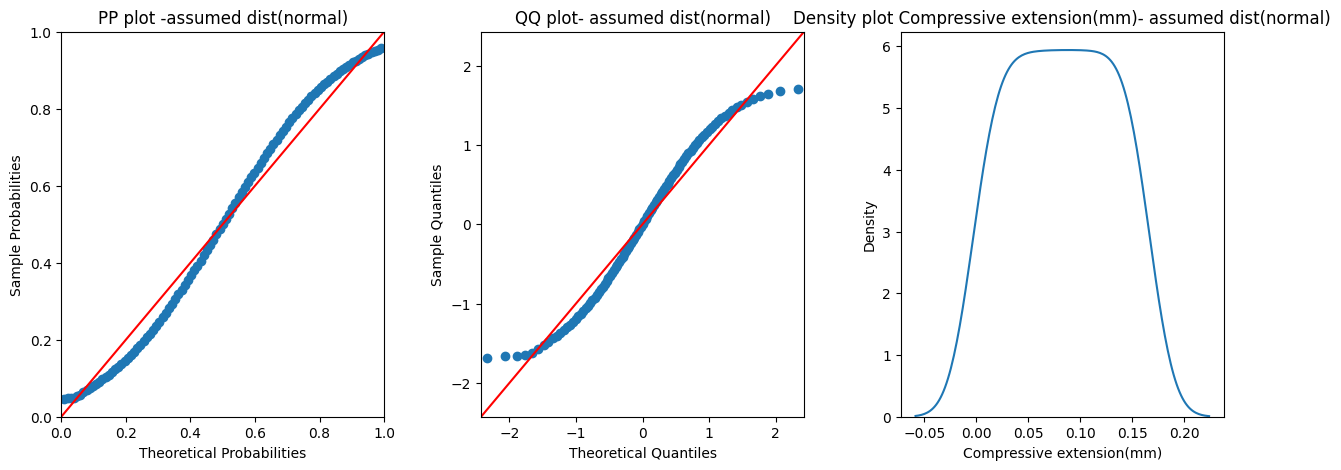

<Figure size 640x480 with 0 Axes>

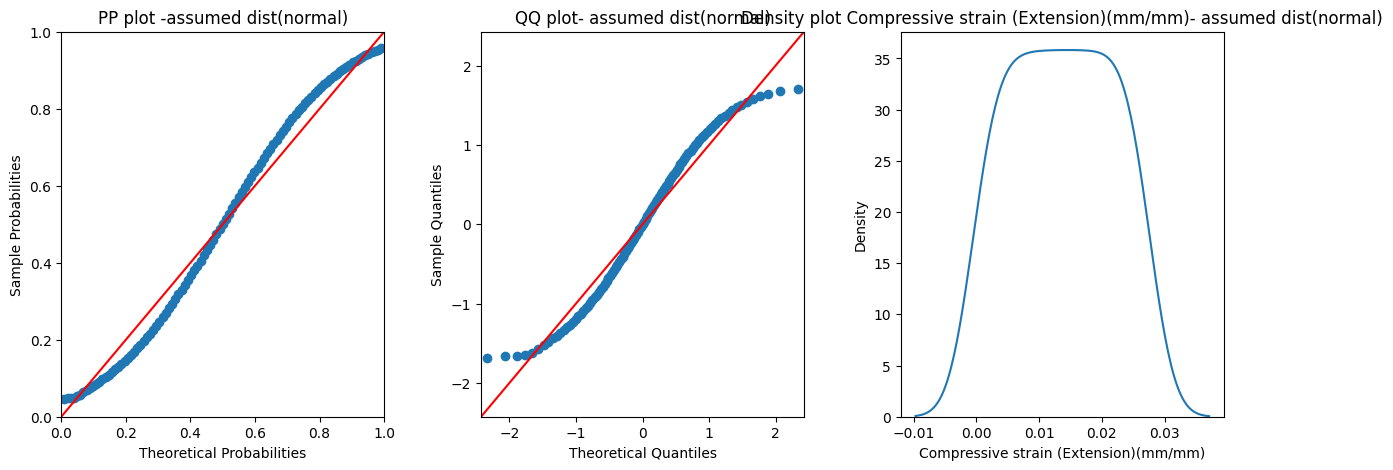

<Figure size 640x480 with 0 Axes>

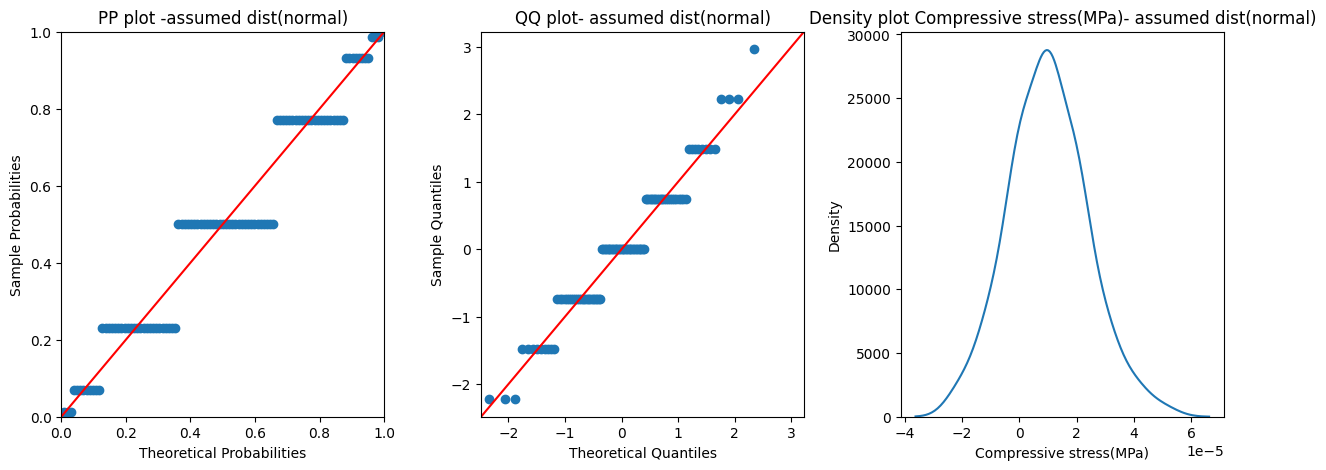

<Figure size 640x480 with 0 Axes>

In [94]:
from scipy import stats
import statsmodels.graphics.gofplots as sm
#plt.figure(figsize=(6, 4))
for i in parameters:
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))
  fig.subplots_adjust(hspace=0.8, wspace=.3)
  a=sm.ProbPlot(df[i],fit=True,dist=stats.norm,).ppplot(line='45',ax=ax[0])
  ax[0].set_title(f'PP plot -assumed dist(normal)')

  b=sm.ProbPlot(df[i],fit=True,dist=stats.norm).qqplot(line='45',ax=ax[1])
  ax[1].set_title(f'QQ plot- assumed dist(normal)')
  sns.kdeplot(df[i],ax=ax[2])
  ax[2].set_title(f'Density plot {i}- assumed dist(normal)')
  plt.show()
  plt.tight_layout()

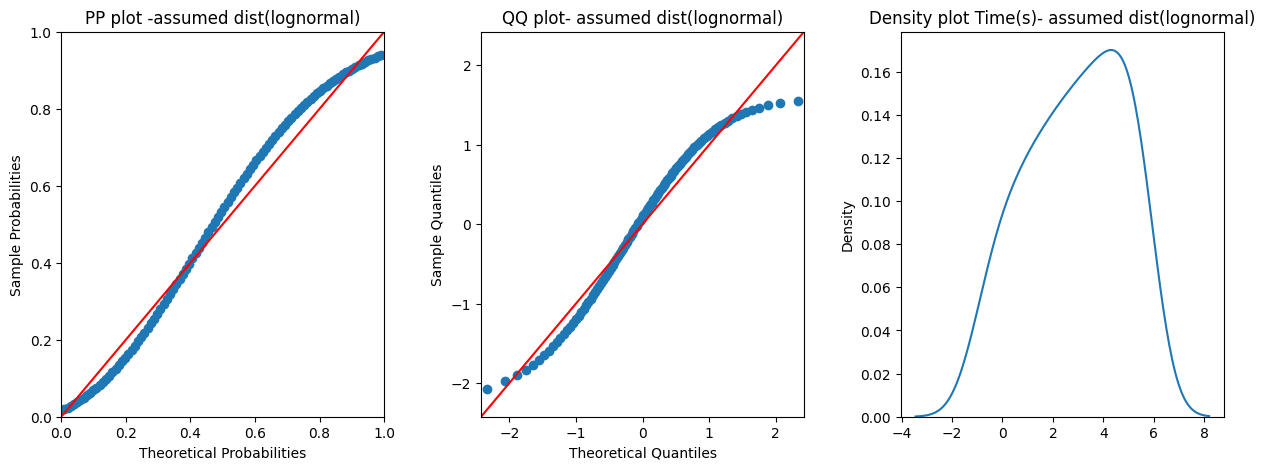

<Figure size 640x480 with 0 Axes>

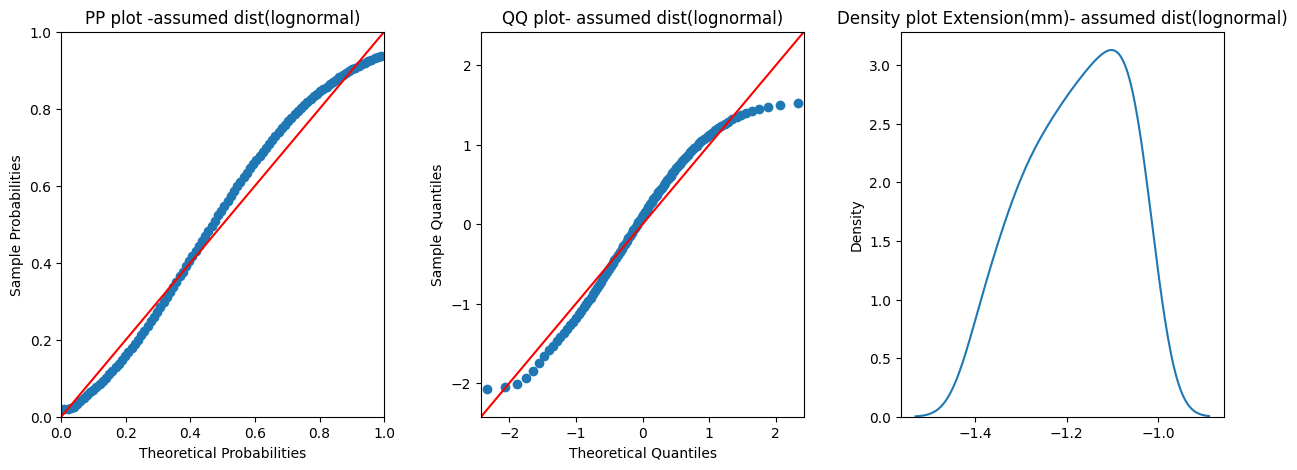

<Figure size 640x480 with 0 Axes>

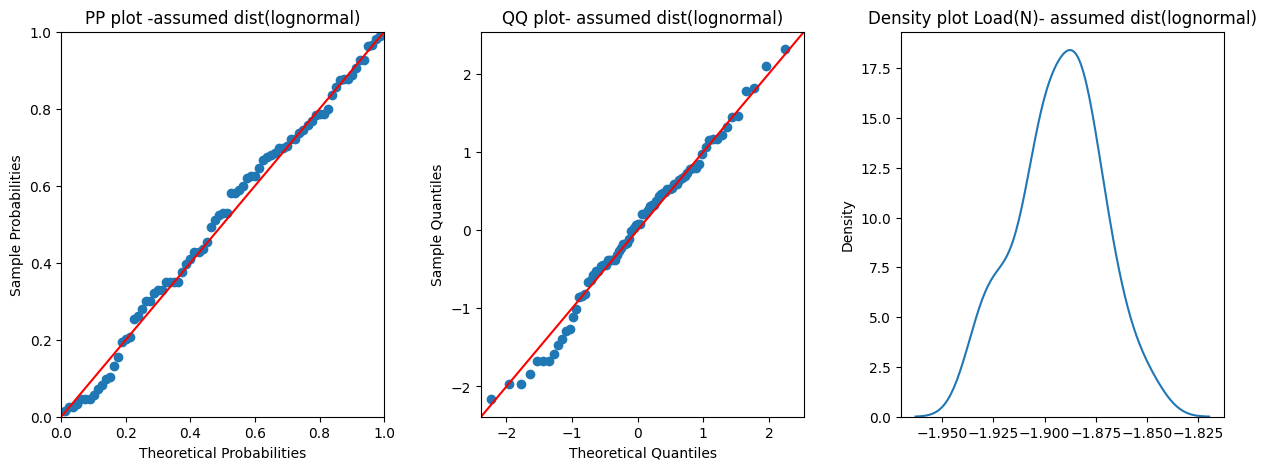

<Figure size 640x480 with 0 Axes>

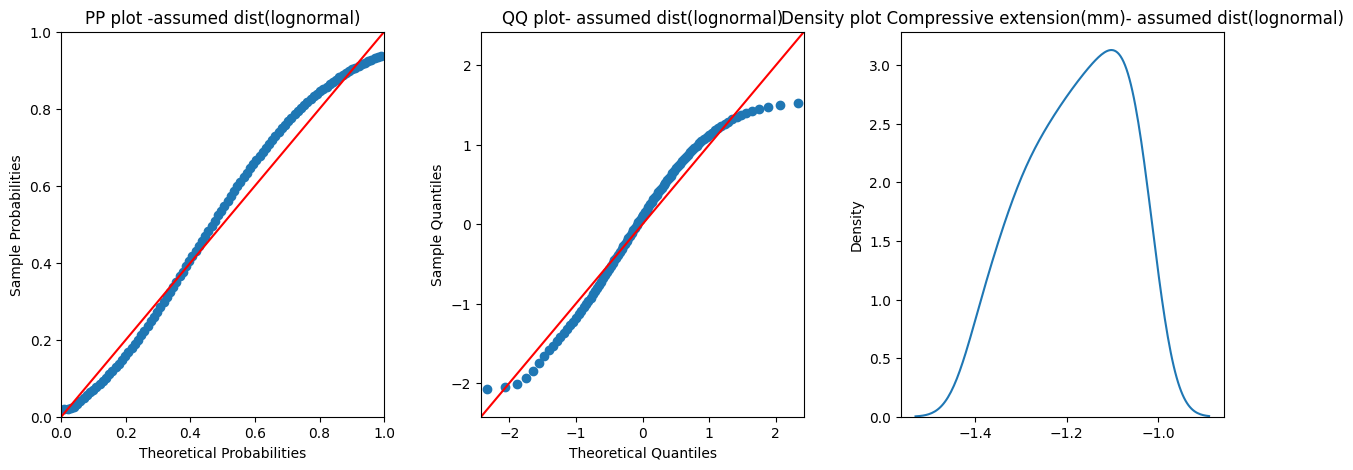

<Figure size 640x480 with 0 Axes>

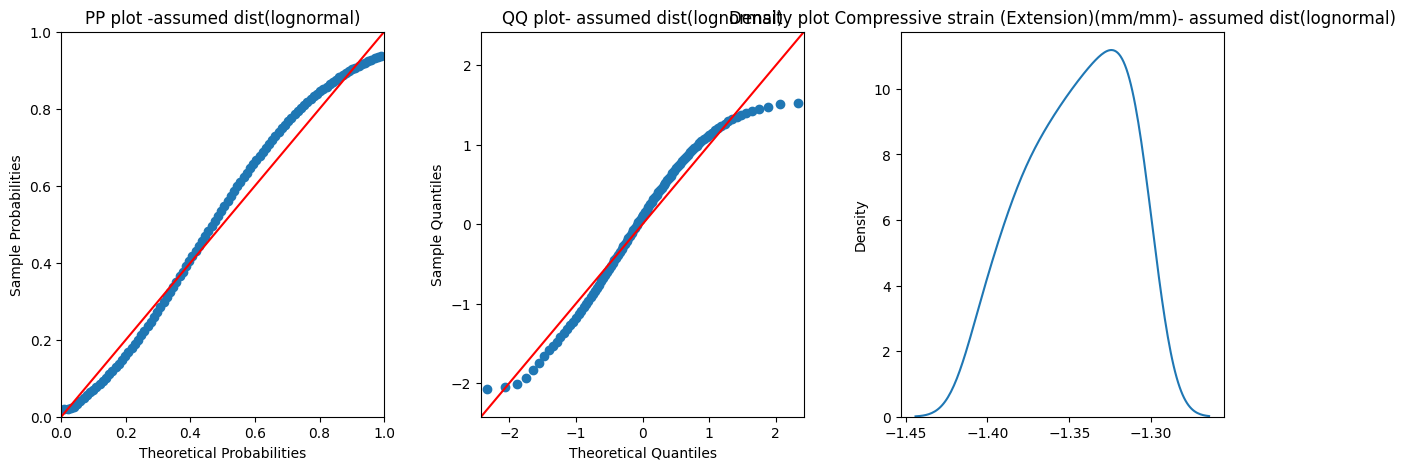

<Figure size 640x480 with 0 Axes>

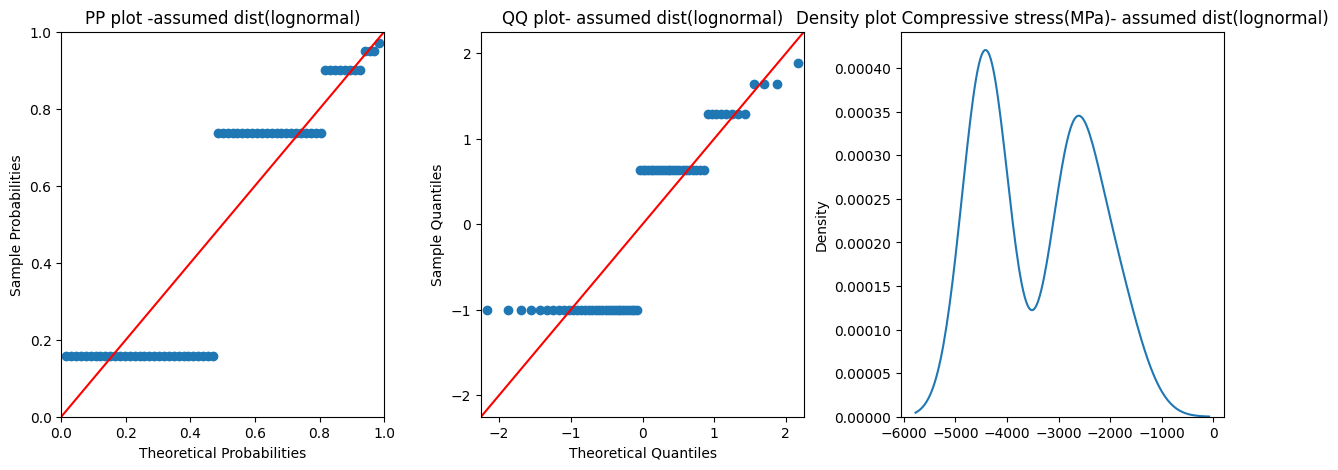

<Figure size 640x480 with 0 Axes>

In [95]:
#boxcox transformation
for i in parameters:
  xt,_ = stats.boxcox(df.loc[df[i]>0][i])
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))
  fig.subplots_adjust(hspace=0.8, wspace=.3)
  a=sm.ProbPlot(xt,fit=True,dist=stats.norm,).ppplot(line='45',ax=ax[0])
  ax[0].set_title(f'PP plot -assumed dist(lognormal)')

  b=sm.ProbPlot(xt,fit=True,dist=stats.norm).qqplot(line='45',ax=ax[1])
  ax[1].set_title(f'QQ plot- assumed dist(lognormal)')

  sns.kdeplot(xt,ax=ax[2])
  ax[2].set_title(f'Density plot {i}- assumed dist(lognormal)')
  plt.show()
  plt.tight_layout()

In [96]:
df

,Time(s),Extension(mm),Load(N),Compressive extension(mm),Compressive strain (Extension)(mm/mm),Compressive stress(MPa)
0,0.0,0.00000,0.00043,0.00000,0.00000,0.00001
1,0.1,0.00076,0.00057,0.00076,0.00013,0.00001
2,0.2,0.00104,-0.00019,0.00104,0.00017,0.00000
3,0.3,0.00173,0.00061,0.00173,0.00029,0.00001
4,0.4,0.00305,0.00008,0.00305,0.00051,0.00000
...,...,...,...,...,...,...
96,9.6,0.15880,0.00171,0.15880,0.02634,0.00003
97,9.7,0.16048,0.00234,0.16048,0.02661,0.00004
98,9.8,0.16214,0.00112,0.16214,0.02689,0.00002
99,9.9,0.16381,0.00269,0.16381,0.02717,0.00004


In [97]:
df.keys()

Index(['Time(s)', 'Extension(mm)', 'Load(N)', 'Compressive extension(mm)',
       'Compressive strain (Extension)(mm/mm)', 'Compressive stress(MPa)'],
      dtype='object')

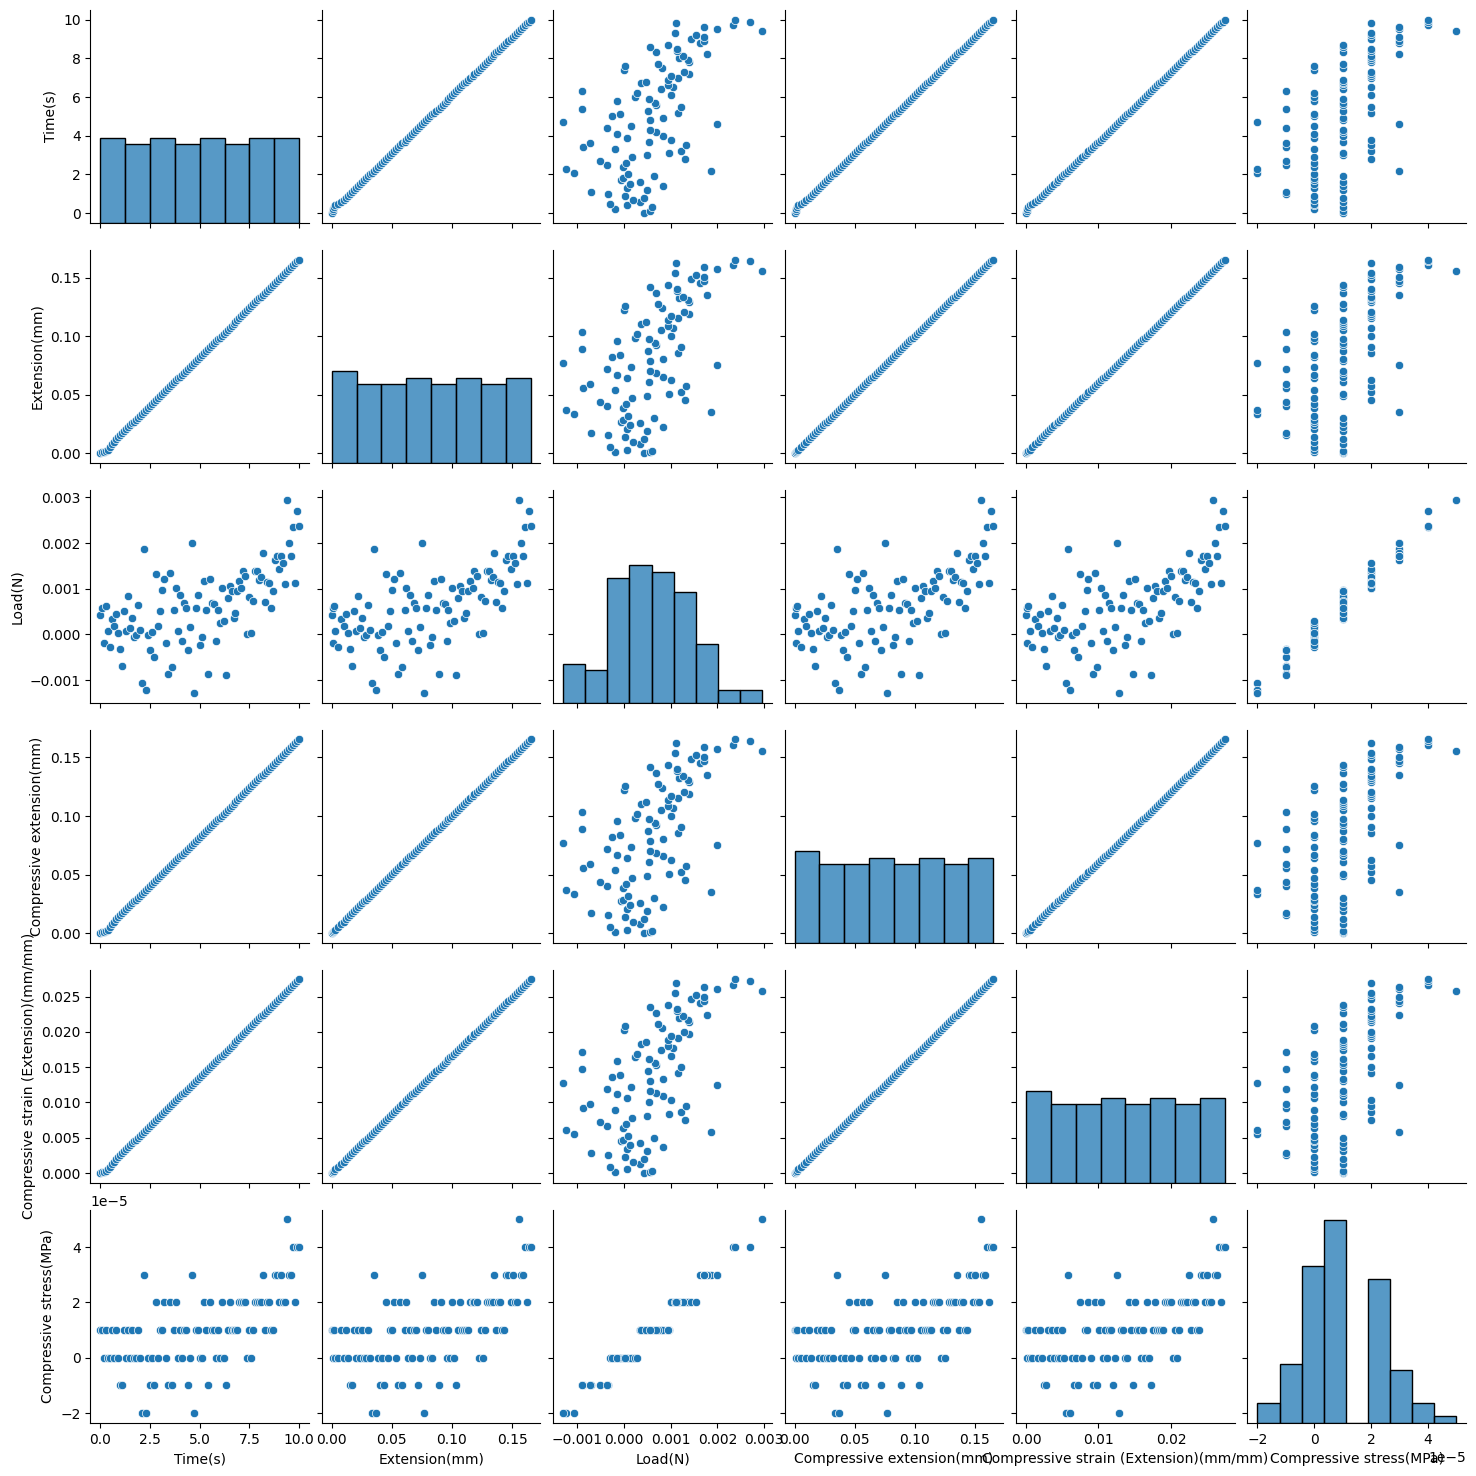

In [98]:
sns.pairplot(df)

<Axes: >

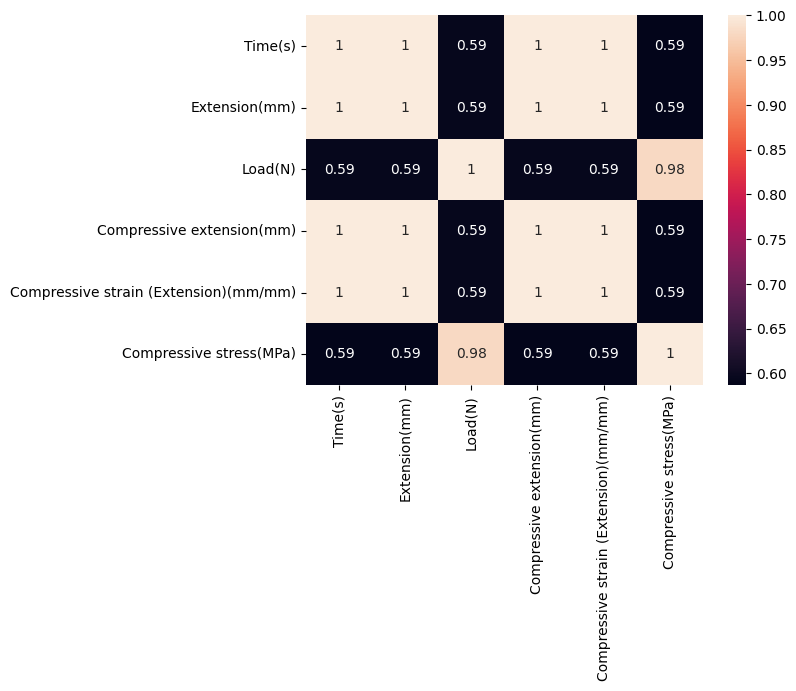

In [99]:
sns.heatmap(df.corr(),annot = True)

# Linear Regression

In [100]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# simple linear regression

In [101]:
features = ['Time(s)', 'Extension(mm)', 'Load(N)', 'Compressive extension(mm)',
       'Compressive strain (Extension)(mm/mm)']

In [102]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

x = df[features]
y=df['Compressive stress(MPa)']
for i in features:
  x=df[i]
  # add a constant term to the features
  x= sm.add_constant(x)
  model = sm.OLS(y, x).fit()
  print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Compressive stress(MPa)   R-squared:                       0.345
Model:                                 OLS   Adj. R-squared:                  0.339
Method:                      Least Squares   F-statistic:                     52.18
Date:                     Wed, 28 Jun 2023   Prob (F-statistic):           1.06e-10
Time:                             13:47:27   Log-Likelihood:                 1010.6
No. Observations:                      101   AIC:                            -2017.
Df Residuals:                           99   BIC:                            -2012.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

# Regression plot between Target & independent variable

y=-0.00+0.00x


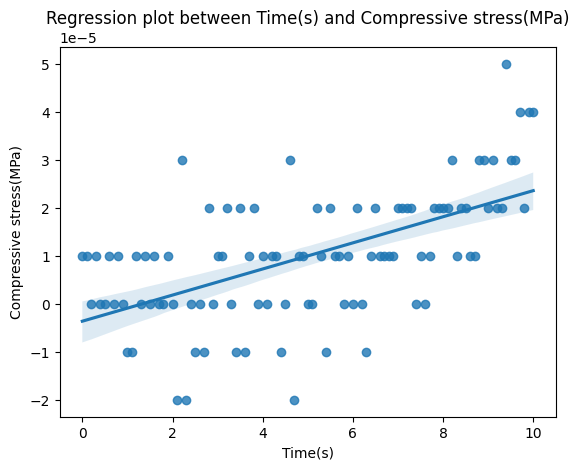

y=-0.00+0.00x


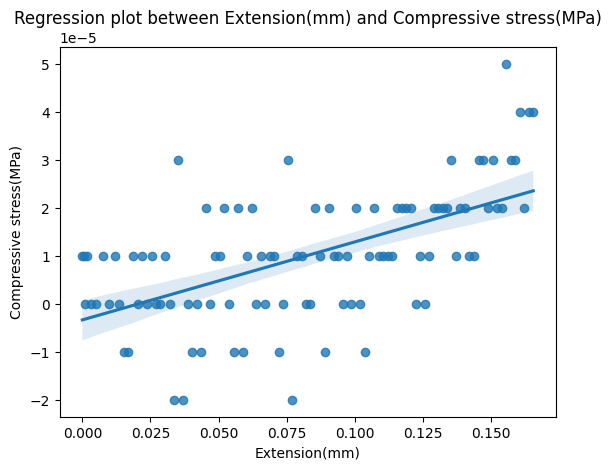

y=0.00+0.02x


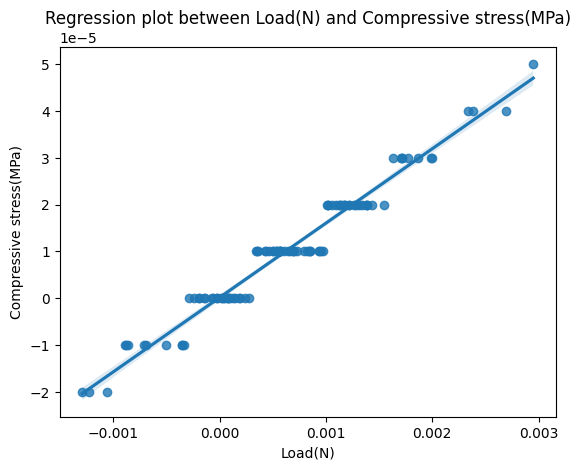

y=-0.00+0.00x


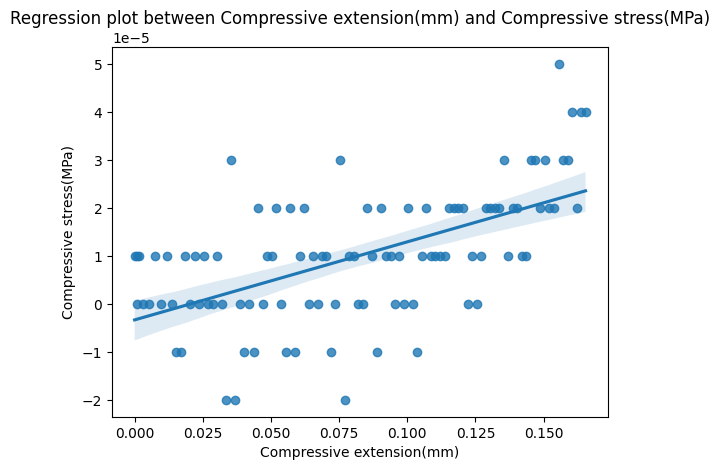

y=-0.00+0.00x


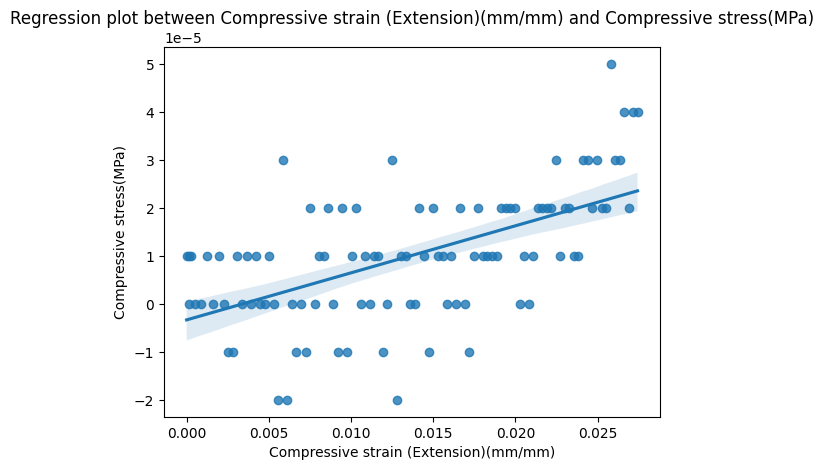

In [103]:
for i in features:
  sns.regplot(x=i, y='Compressive stress(MPa)', data=df)
  plt.title(f'Regression plot between {i} and Compressive stress(MPa)')
  lr.fit(df[i].values.reshape(-1, 1),df['Compressive stress(MPa)'].values.reshape(-1, 1))
  print(f'y={lr.intercept_[0]:.2f}+{lr.coef_[0][0]:.2f}x')
  plt.show()

# Multiple Linear ergression

In [104]:
df.keys()

Index(['Time(s)', 'Extension(mm)', 'Load(N)', 'Compressive extension(mm)',
       'Compressive strain (Extension)(mm/mm)', 'Compressive stress(MPa)'],
      dtype='object')

In [105]:
df = df.rename(columns={'Time(s)':'Time',
                        'Extension(mm)':'extension',
                        'Load(N)': 'Load',
                        'Compressive extension(mm)': 'compextension',
                        'Compressive strain (Extension)(mm/mm)': 'compstrain',
                        'Compressive stress(MPa)': 'comp_stress',
                        })

In [106]:
df.head()

,Time,extension,Load,compextension,compstrain,comp_stress
0,0.0,0.00000,0.00043,0.00000,0.00000,0.00001
1,0.1,0.00076,0.00057,0.00076,0.00013,0.00001
2,0.2,0.00104,-0.00019,0.00104,0.00017,0.00000
3,0.3,0.00173,0.00061,0.00173,0.00029,0.00001
4,0.4,0.00305,0.00008,0.00305,0.00051,0.00000


In [108]:
model = ols(formula='comp_stress~Time+extension+Load+compextension+compstrain',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            comp_stress   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     599.0
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           6.13e-67
Time:                        13:47:28   Log-Likelihood:                 1153.7
No. Observations:                 101   AIC:                            -2297.
Df Residuals:                      96   BIC:                            -2284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.719e-07   1.24e-06     -0.622      0.535   -3.23e-06    1.69e-06
Time           8.219e-06   1.16e-05      0.711      0.479   -1.47e-05    3.12e-05
extension         0.0106      0.008      1.395      0.166      -0.004       0.026
Load              0.0157      0.000     38.978      0.000       0.015       0.017
compextension     0.0106      0.008      1.395      0.166      -0.004       0.026
compstrain       -0.1310      0.092     -1.423      0.158      -0.314       0.052
==============================================================================
Omnibus:                        9.624   Durbin-Watson:                   2.437
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                4.495
Skew:                          -0.276   Prob(JB):                        0.106
Kurtosis:                       2.126   Cond. No.                     5.34e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-38. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# hypothesis testing

In [109]:
features = df.keys()

In [110]:
from scipy.stats import ttest_1samp

# Set significance level
alpha = 0.05
# Create an empty dataframe to store the t-test results
results = pd.DataFrame(columns=['Column', 'Population mean','Sample mean','Sample_std_dev','t-value','p-value','result'])

# Perform hypothesis testing for each column
for col in features:
  # Take 8 random samples of size 100 from the column
  pop_mean=df[col].mean()
  mysample=df[col].sample(n=100)
  sample_mean = np.mean(mysample)
  # Calculate the sample standard deviation
  sample_std = np.std(mysample, ddof=1)
  # Calculate the t-value and p-value using one-sample t-test
  t_value, p_value = ttest_1samp(mysample, popmean=df[col].mean())

  # Determine if the null hypothesis is rejected based on the p-value
  if p_value < alpha:
    result = 'rejected'
  else:
    result = 'not rejected'
  # Add the t-test results to the dataframe
  new_row = pd.DataFrame({'Column': [col], 'Population mean': [pop_mean], 'Sample mean': [sample_mean], 'Sample_std_dev': [sample_std], 't-value': [t_value], 'p-value': [p_value], 'result': [result]})
  results = pd.concat([results, new_row], ignore_index=True)

In [111]:
results

,Column,Population mean,Sample mean,Sample_std_dev,t-value,p-value,result
0,Time,5.000000,4.983000,2.939768,-0.057828,0.954002,not rejected
1,extension,0.081969,0.081386,0.048873,-0.119393,0.905206,not rejected
2,Load,0.000621,0.000626,0.000840,0.056055,0.955411,not rejected
3,compextension,0.081969,0.082772,0.048555,0.165254,0.869081,not rejected
4,compstrain,0.013594,0.013599,0.008163,0.006537,0.994797,not rejected
5,comp_stress,0.000010,0.000010,0.000013,0.148340,0.882376,not rejected
